In [46]:
import pandas as pd
import evaluation

In [47]:
offline_data='./submit_offline.csv'
offline_ground_true='/disk1/wangjialei/datasets/OIA-ODIR/Off_site_Test_Set/Annotation/off_site_test_annotation_(English).csv'
gt_data=evaluation.importGT_csv(offline_ground_true)
pr_data, wrong_col_order, wrong_row_order, missing_results = evaluation.importPR(gt_data,offline_data)


In [48]:
def get_tp_fp_pair(pr_data,gt_data):
    N_pair=[]
    D_pair=[]
    G_pair=[]
    C_pair=[]
    A_pair=[]
    M_pair=[]
    H_pair=[]
    O_pair=[]
    N_pair=get_single_roc(pr_data=pr_data[:,1],gt_data=gt_data[:,1])
    D_pair=get_single_roc(pr_data=pr_data[:,2],gt_data=gt_data[:,2])
    G_pair=get_single_roc(pr_data=pr_data[:,3],gt_data=gt_data[:,3])
    C_pair=get_single_roc(pr_data=pr_data[:,4],gt_data=gt_data[:,4])
    A_pair=get_single_roc(pr_data=pr_data[:,5],gt_data=gt_data[:,5])
    H_pair=get_single_roc(pr_data=pr_data[:,6],gt_data=gt_data[:,6])
    M_pair=get_single_roc(pr_data=pr_data[:,7],gt_data=gt_data[:,7])
    O_pair=get_single_roc(pr_data=pr_data[:,8],gt_data=gt_data[:,8])
    return N_pair,D_pair,G_pair,C_pair,A_pair,M_pair,H_pair,O_pair

def get_single_roc(pr_data,gt_data):
    FN=0
    TP=0
    FP=0
    TN=0
    result=[]
    for pr,gt in zip(pr_data,gt_data):
        if pr==0 and gt==0:
            TN+=1
        elif pr==1 and gt==0:
            FP+=1
        elif pr==1 and gt==1:
            TP+=1
        else:
            FN+=1
        if FP+TN!=0 and TP+FN!=0:
            result.append((FP/(FP+TN),TP/(TP+FN)))
    return result

In [49]:
N,D,G,C,A,M,H,O=get_tp_fp_pair(pr_data=pr_data>0.5,gt_data=gt_data)



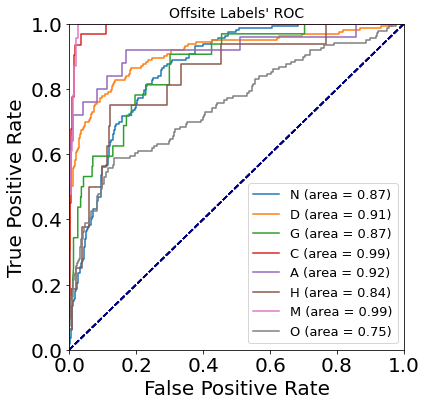

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import csv
import sys
import numpy as np
plt.figure(figsize=(6, 6))

def ro_curve(y_pred, y_label, figure_file, method_name):
    '''
        y_pred is a list of length n.  (0,1)
        y_label is a list of same length. 0/1
        https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py  
    '''
    y_label = np.array(y_label)
    y_pred = np.array(y_pred)    
    fpr = dict()
    tpr = dict() 
    roc_auc = dict()
    fpr[0], tpr[0], _ = roc_curve(y_label, y_pred)
    roc_auc[0] = auc(fpr[0], tpr[0])
    lw = 1.5
    plt.title("Offsite Labels' ROC",fontsize = 14)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.plot(fpr[0], tpr[0],
         lw=lw, label= method_name + ' (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    # plt.xticks(font="Times New Roman",size=18,weight="bold")
    # plt.yticks(font="Times New Roman",size=18,weight="bold")
    fontsize = 20
    plt.xlabel('False Positive Rate', fontsize = fontsize)
    plt.ylabel('True Positive Rate', fontsize = fontsize)
    #plt.title('Receiver Operating Characteristic Curve', fontsize = fontsize)
    plt.legend(loc="lower right",prop={'size':13})
    plt.savefig(figure_file + ".pdf")
    return 
names=['N','D','G','C','A','H','M','O']
def col_pic(pre,gt):
    for i in range(8):
        ro_curve(pre[:,i+1],gt[:,i+1],"offline",names[i])

col_pic(pr_data,gt_data)
